In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Watera.csv')

In [4]:
df.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0


In [5]:
df.shape

(100000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


In [8]:
df.describe()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,96879.000000,100000.000000,97616.000000,100000.000000,99187.000000,98402.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.249512,309.214750,330.220307,2.500058,252.959861,2008.131292,7.198689,72.739010,3.139499,0.076160
std,0.995618,222.321384,246.036043,1.616047,152.955911,4028.651516,3.507656,50.389586,2.417457,0.265255
min,5.000000,0.000000,0.030000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,6.490000,151.540000,160.547500,1.230000,137.920000,713.882500,4.710000,29.997500,1.450000,0.000000
50%,7.240000,271.080000,270.155000,2.410000,237.050000,1438.565000,7.300000,68.010000,2.660000,0.000000
75%,7.970000,391.580000,378.412500,3.570000,336.460000,2163.937500,9.840000,105.700000,4.300000,0.000000
max,9.990000,1099.990000,1099.990000,8.990000,799.970000,39961.990000,17.990000,229.960000,13.990000,1.000000


## Detecting Null values

In [7]:
df.isnull().sum()

,0
ph,3121
hardness,0
tds,2384
chlorine,0
sulfate,813
conductivity,1598
organic_carbon,0
trihalomethanes,0
turbidity,0
potability,0


In [15]:
round((df.isnull().sum()/len(df))*100,2)

,0
ph,3.12
hardness,0.00
tds,2.38
chlorine,0.00
sulfate,0.81
conductivity,1.60
organic_carbon,0.00
trihalomethanes,0.00
turbidity,0.00
potability,0.00


In [33]:
for i in df.columns:
  if df[i].isnull().any():
    print(i)

ph
tds
sulfate
conductivity


<Axes: ylabel='Density'>

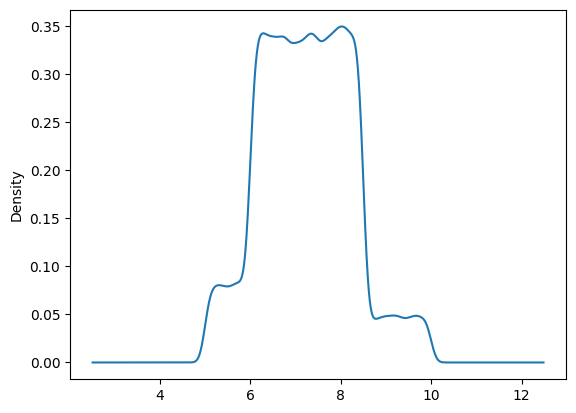

In [34]:
df["ph"].plot(kind='kde')


<Axes: ylabel='Density'>

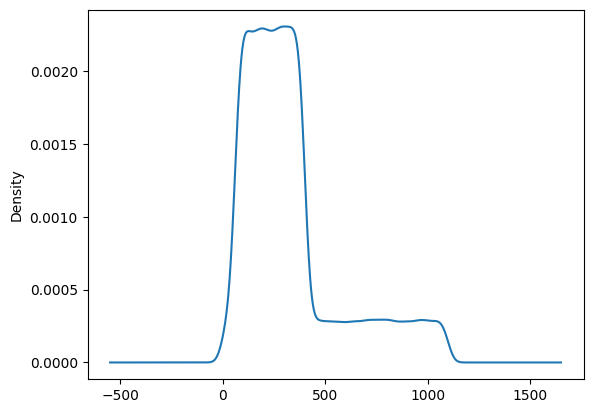

In [35]:
df["tds"].plot(kind='kde')

<Axes: ylabel='Density'>

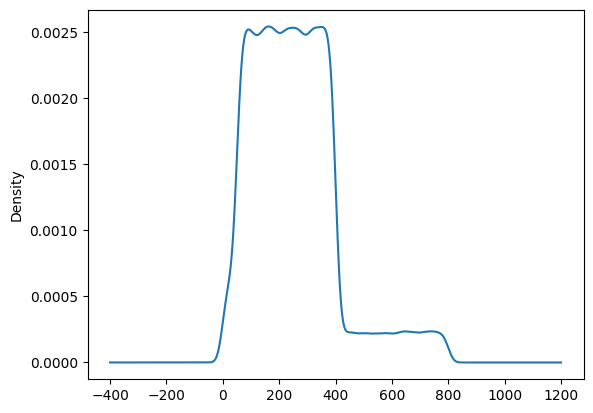

In [36]:
df["sulfate"].plot(kind='kde')

<Axes: ylabel='Density'>

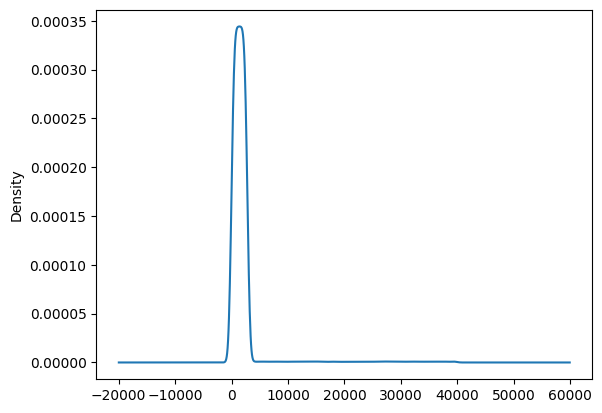

In [37]:
df["conductivity"].plot(kind='kde')

## Filling Null values

In [38]:
df["ph"].fillna(round(df["ph"].mean(),2),inplace=True) # ph's graph near to uniform distribution

In [39]:
df["tds"].fillna(df["tds"].median(),inplace=True) # it having skewness

In [40]:
df["sulfate"].fillna(df["sulfate"].median(),inplace=True) # it having skewness

In [41]:
df["conductivity"].fillna(df["conductivity"].median(),inplace=True) # it having skewness

In [43]:
df.isnull().sum() # after clearing and filling null values

,0
ph,0
hardness,0
tds,0
chlorine,0
sulfate,0
conductivity,0
organic_carbon,0
trihalomethanes,0
turbidity,0
potability,0


### Outliers
- Outliers are the extreme values that doesnot suit in the original group
### Dectecting Outliers

<Axes: xlabel='tds'>

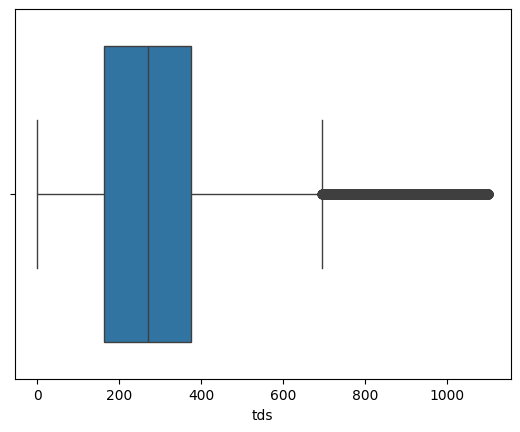

In [45]:
sns.boxplot(data=df,x=df["tds"])

In [53]:
q1=df['tds'].quantile(0.25)
q3=df['tds'].quantile(0.75)
IQR=q3-q1
median=df['tds'].median()
print(f'quantile1: {q1} ,quantile3: {q3} ,IQR: {IQR} ,median: {median}')

quantile1: 163.1975 ,quantile3: 375.82 ,IQR: 212.6225 ,median: 270.155


In [54]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR
print(f'lower_fence: {lower_fence} ,upper_fence: {upper_fence}')

lower_fence: -155.73625000000004 ,upper_fence: 694.7537500000001


In [55]:
df[(df['tds']<lower_fence) | (df['tds']>upper_fence)]

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
7,6.98,444.42,767.34,3.66,304.14,2426.02,11.28,51.66,1.36,0
13,9.43,308.09,907.50,5.87,121.64,2750.99,0.37,108.45,1.54,0
21,6.32,356.57,999.20,2.12,219.52,942.85,8.22,39.16,2.15,0
22,6.12,184.84,869.86,2.87,194.40,1483.32,11.83,39.97,5.19,0
30,9.93,20.52,804.61,4.02,205.41,1345.84,1.07,46.39,4.36,0
...,...,...,...,...,...,...,...,...,...,...
99955,8.05,445.26,994.75,2.59,387.58,2493.75,9.09,66.04,1.42,0
99972,8.15,441.69,1070.98,2.15,409.41,184.82,10.29,3.90,1.21,0
99980,6.04,1003.20,1075.16,0.63,317.59,2513.66,4.91,14.20,3.07,0
99989,9.71,205.34,708.81,3.10,217.35,2750.72,6.82,123.49,2.29,0


In [57]:
len(df[(df['tds']<lower_fence) | (df['tds']>upper_fence)])

11371

In [60]:
print(f"Outliers(in percentage):{round(len(df[(df['tds']<lower_fence) | (df['tds']>upper_fence)])/len(df)*100,2)}%")

Outliers(in percentage):11.37%
